In [1]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv


In [2]:
df = pd.read_csv("result_amazon-freertos.csv", header=1, encoding='utf-8')
display(df)

,Unnamed: 0,aggarg@amazon.com,willrans@amazon.com,6563840+sarenameas@users.noreply.github.com,ts.whu@outlook.com,dcg@amazon.com,anoxon@ube9a1bae06555b.ant.amazon.com,33439348+alexa-noxon@users.noreply.github.com,noreply@github.com,33438817+huguesBouvier@users.noreply.github.com,...,65681039+billwatersiii@users.noreply.github.com,mingyue86010@gmail.com.1,35610464+ifyall@users.noreply.github.com,divekarshubham@gmail.com,jjulicher@mac.com,54409667+ashmagin@users.noreply.github.com,czjaso@amazon.com,laukik.hase@espressif.com,33909469+xuelix@users.noreply.github.com,mark.h.spatz@gmail.com
0,demos/common,39.583333,0.0,0.0,0.0,0.0,0.0,0.0,21.180556,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,demos/common/demo_runner,20.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,demos/common/demo_runner/aws_demo_runner.c,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,demos/common/devmode_key_provisioning,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,demos/common/devmode_key_provisioning/aws_dev_...,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,libraries/abstractions/pkcs11/test/MBT_SignMac...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,libraries/abstractions/pkcs11/test/MBT_VerifyM...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,libraries/abstractions/transport/secure_sockets,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,libraries/abstractions/transport/secure_socket...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Extrair os nomes dos autores, ignorando a primeira coluna
autores = df.columns[1:].tolist()
print(autores)

# Inicializar dicionários para contar arquivos por desenvolvedor e desenvolvedores por arquivo
arquivos_por_responsavel = {autor: 0 for autor in autores}
responsaveis_por_arquivo = {}

# Iterar sobre cada autor
for autor in autores:
    arquivos = []
    for index, row in df.iterrows():
        try:
            ownership = float(row[autor])
        except ValueError:
            ownership = 0.0
        if ownership > 0:  # Se a posse do arquivo for maior que 0%
            arquivo = row['Unnamed: 0']
            arquivos.append(arquivo)
            arquivos_por_responsavel[autor] += 1  # Incrementar contador de arquivos do desenvolvedor
            
            # Incrementar contador de desenvolvedores do arquivo
            if arquivo in responsaveis_por_arquivo:
                responsaveis_por_arquivo[arquivo].add(autor)
            else:
                responsaveis_por_arquivo[arquivo] = {autor}
    
    if arquivos:  # Só imprimir se houver arquivos
        print(f"Arquivos de {autor}: {arquivos}")
    else:
        print(f"Arquivos de {autor}: Nenhum arquivo encontrado")




['aggarg@amazon.com', 'willrans@amazon.com', '6563840+sarenameas@users.noreply.github.com', 'ts.whu@outlook.com', 'dcg@amazon.com', 'anoxon@ube9a1bae06555b.ant.amazon.com', '33439348+alexa-noxon@users.noreply.github.com', 'noreply@github.com', '33438817+huguesBouvier@users.noreply.github.com', '33438817+huguesBouvier@users.noreply.github.com.1', 'bhagavar@amazon.com', '36049150+gordonwang0@users.noreply.github.com', 'xuelixie@amazon.com', 'pvyawaha@amazon.com', 'abhidixi@amazon.com', '33438817+huguesBouvier@users.noreply.github.com.2', 'hbouvier@amazon.com', 'kmeshcheryakov@klika-tech.com', 'qiutongs@amazon.com', 'qiutongs@amazon.com.1', '33439348+alexa-noxon@users.noreply.github.com.1', '35851496+cobusve@users.noreply.github.com', 'nmradula@amazon.com', '33462878+aggarg@users.noreply.github.com', 'horneda@amazon.com', 'WRansohoff@users.noreply.github.com', 'hein@htibosch.net', 'sachin.parekh@espressif.com', '33439635+dcgaws@users.noreply.github.com', '10982575+yuhui-zheng@users.norepl

In [14]:
# Função para contar o número total de responsáveis por arquivos
def contar_responsaveis_com_arquivos(arquivos_por_responsavel):
    # Contar apenas autores que têm arquivos
    responsaveis_com_arquivos = sum(1 for count in arquivos_por_responsavel.values() if count > 0)
    return responsaveis_com_arquivos

# Usar a função
total_responsaveis = contar_responsaveis_com_arquivos(arquivos_por_responsavel)
print(f"Total de responsáveis: {total_responsaveis}")


Total de responsáveis: 61


In [13]:
# Função para contar o número total de responsáveis por arquivos
def contar_responsaveis_com_arquivos(arquivos_por_responsavel):
    # Contar apenas autores que têm arquivos
    responsaveis_com_arquivos = sum(1 for count in arquivos_por_responsavel.values())
    return responsaveis_com_arquivos

# Usar a função
total_responsaveis = contar_responsaveis_com_arquivos(arquivos_por_responsavel)
print(f"Total de contribuidores: {total_responsaveis}")

Total de contribuidores: 131


In [5]:
# Caminho do arquivo CSV de saída
output_file = 'contagem_arquivos_por_responsavel_amazon-freertos.csv'

# Escrever contagem de arquivos por responsavel em CSV
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Responsável', 'Descrição'])

    for autor, count in arquivos_por_responsavel.items():
        if count == 1:
            writer.writerow([autor, f"{count}"])
        else:
            writer.writerow([autor, f"{count}"])

print(f"Contagem de arquivos por desenvolvedor salva em {output_file}")



Contagem de arquivos por desenvolvedor salva em contagem_arquivos_por_responsavel_amazon-freertos.csv


In [6]:
data = pd.read_csv("contagem_arquivos_por_responsavel_amazon-freertos.csv", encoding='utf-8')
display(data)

,Responsável,Descrição
0,aggarg@amazon.com,392
1,willrans@amazon.com,0
2,6563840+sarenameas@users.noreply.github.com,43
3,ts.whu@outlook.com,73
4,dcg@amazon.com,10
...,...,...
126,54409667+ashmagin@users.noreply.github.com,0
127,czjaso@amazon.com,6
128,laukik.hase@espressif.com,0
129,33909469+xuelix@users.noreply.github.com,0


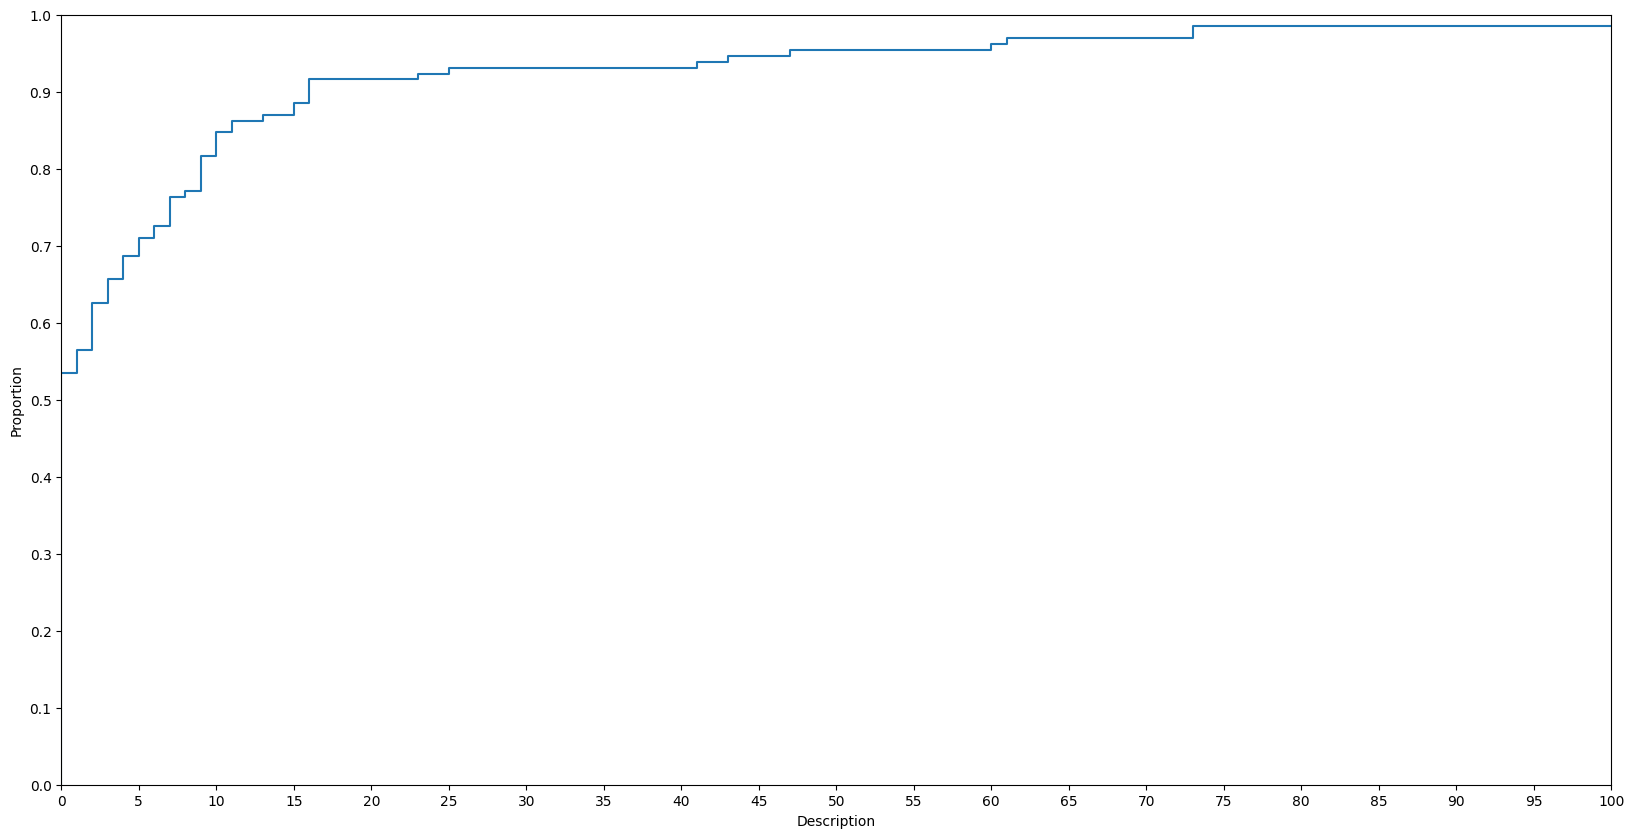

In [7]:
# Converter a coluna "Descrição" para valores numéricos
data['Descrição'] = pd.to_numeric(data['Descrição'], errors='coerce')

# Definir o tamanho do gráfico
plt.figure(figsize=(20, 10))

# Criar o gráfico ECDF
sns.ecdfplot(data=data, x='Descrição')


plt.ylim(0, 1)  # Ajustar a escala do eixo y

plt.yticks(np.arange(0, 1.1, 0.1))  # Ajustar os ticks do eixo y para que sejam de 0.1 em 0.1

plt.xlabel('Description') # Definir o rótulo do eixo x

# Ajustar a escala do eixo x
plt.xlim(0, 100)  # Ajuste os valores conforme necessário

# Ajustar os ticks do eixo x para que sejam de 5 em 5
plt.xticks(np.arange(0, 101, 5))

# Exibir o gráfico
plt.show()

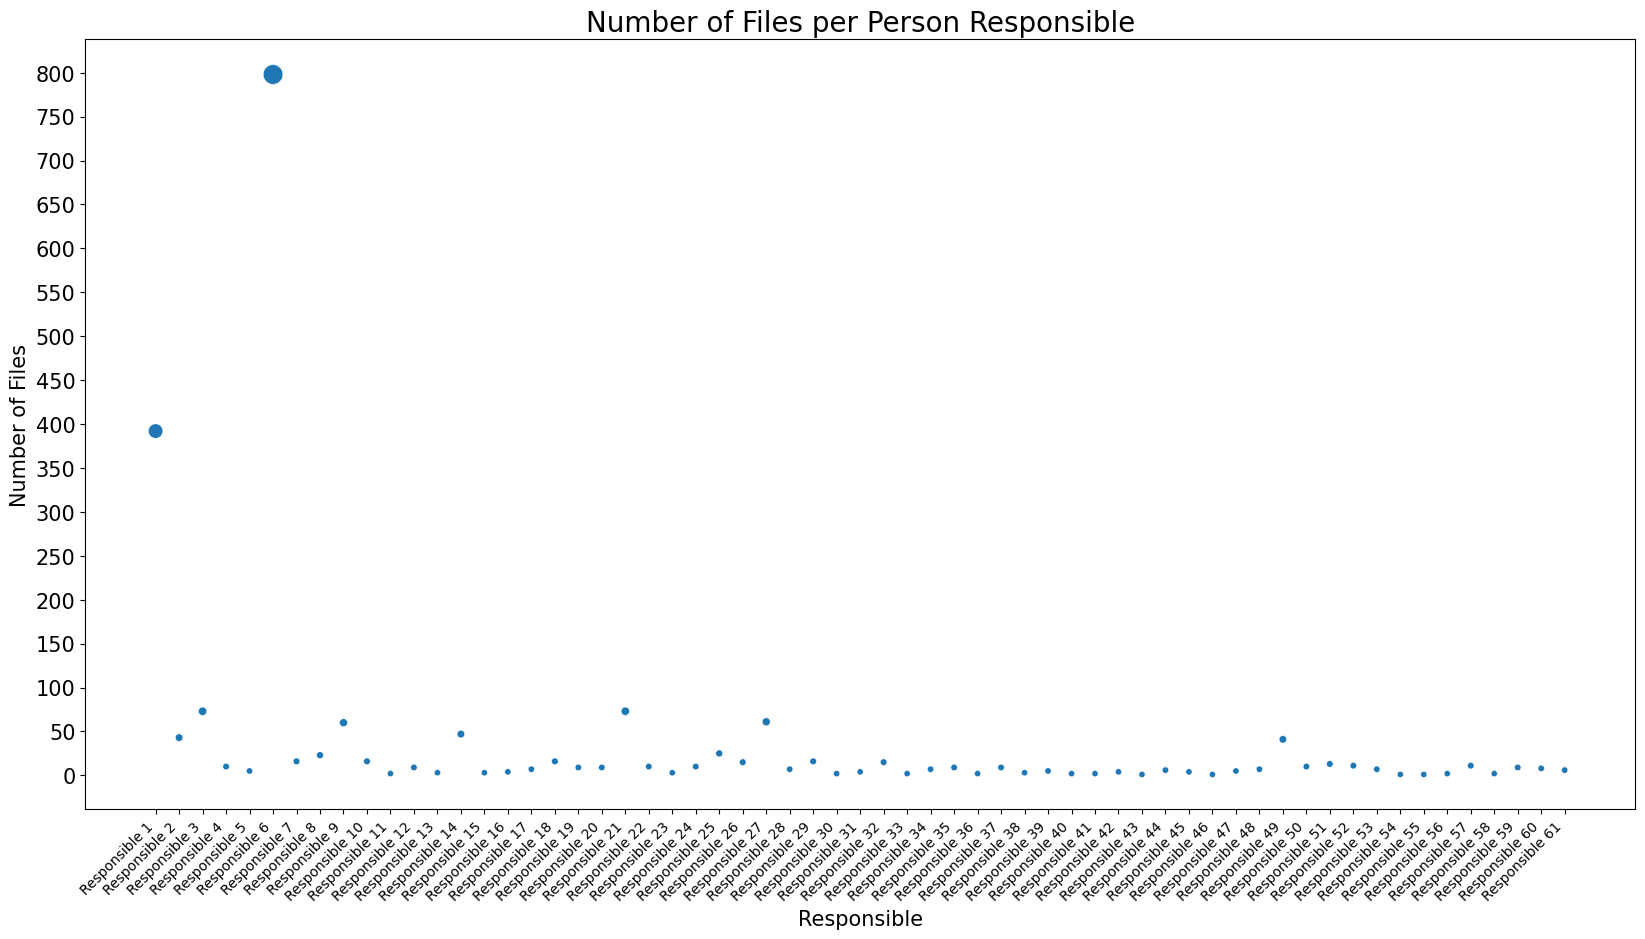

In [8]:

# Filtrar os dados para mostrar apenas aqueles com mais de 20 arquivos, excluindo os responsáveis com 0 arquivos
filtered_data = data[data['Descrição'] > 0].copy()

# Substituir e-mails por "Responsável 1", "Responsável 2", etc.
filtered_data['Responsável'] = ['Responsible {}'.format(i+1) for i in range(len(filtered_data))]

# Criar uma coluna "Tamanho" para o tamanho das bolhas
filtered_data['Tamanho'] = filtered_data['Descrição'] * 10  # Ajuste conforme necessário

# Criar o gráfico de bolhas
plt.figure(figsize=(20, 10))
sns.scatterplot(data=filtered_data, x='Responsável', y='Descrição', size='Tamanho', sizes=(20, 200), legend=False)

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=45, ha='right')

plt.xlabel('Responsible', fontsize=15)  # Ajustar o rótulo do eixo x
plt.ylabel('Number of Files', fontsize=15)  # Ajustar o rótulo do eixo y
plt.title('Number of Files per Person Responsible', fontsize=20)  # Título do gráfico

plt.yticks(np.arange(0, 801, 50), fontsize=15)  # Ajustar os ticks do eixo y

# Exibir o gráfico
plt.show()

In [9]:
# Contar número de responsáveis por arquivo
num_responsaveis_por_arquivo = {arquivo: len(responsaveis) 
                                   for arquivo, responsaveis in responsaveis_por_arquivo.items()}
# Caminho do arquivo CSV de saída
output_file = 'contagem_responsaveis_por_arquivo_amazon-freertos.csv'

# Escrever contagem de desenvolvedores por arquivo em CSV
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Arquivo', 'Descrição'])

    for arquivo, count in num_responsaveis_por_arquivo.items():
        if count > 1:
            writer.writerow([arquivo, f"{count} "])
        else:
            writer.writerow([arquivo, f"{count} "])

print(f"Contagem de desenvolvedores por arquivo salva em {output_file}")

Contagem de desenvolvedores por arquivo salva em contagem_responsaveis_por_arquivo_amazon-freertos.csv


In [10]:
data = pd.read_csv("contagem_responsaveis_por_arquivo_amazon-freertos.csv", encoding='utf-8')
display(data)

,Arquivo,Descrição
0,demos/common,5
1,demos/common/demo_runner,3
2,demos/common/demo_runner/aws_demo_runner.c,1
3,demos/common/devmode_key_provisioning,1
4,demos/common/devmode_key_provisioning/aws_dev_...,1
...,...,...
1354,vendors/cypress/MTB/psoc6/common,1
1355,libraries/c_sdk/standard/mqtt/src/iot_mqtt_ser...,1
1356,vendors/ti/boards/cc3220_launchpad/ports/ota,1
1357,vendors/ti/boards/cc3220_launchpad/ports/ota_p...,1


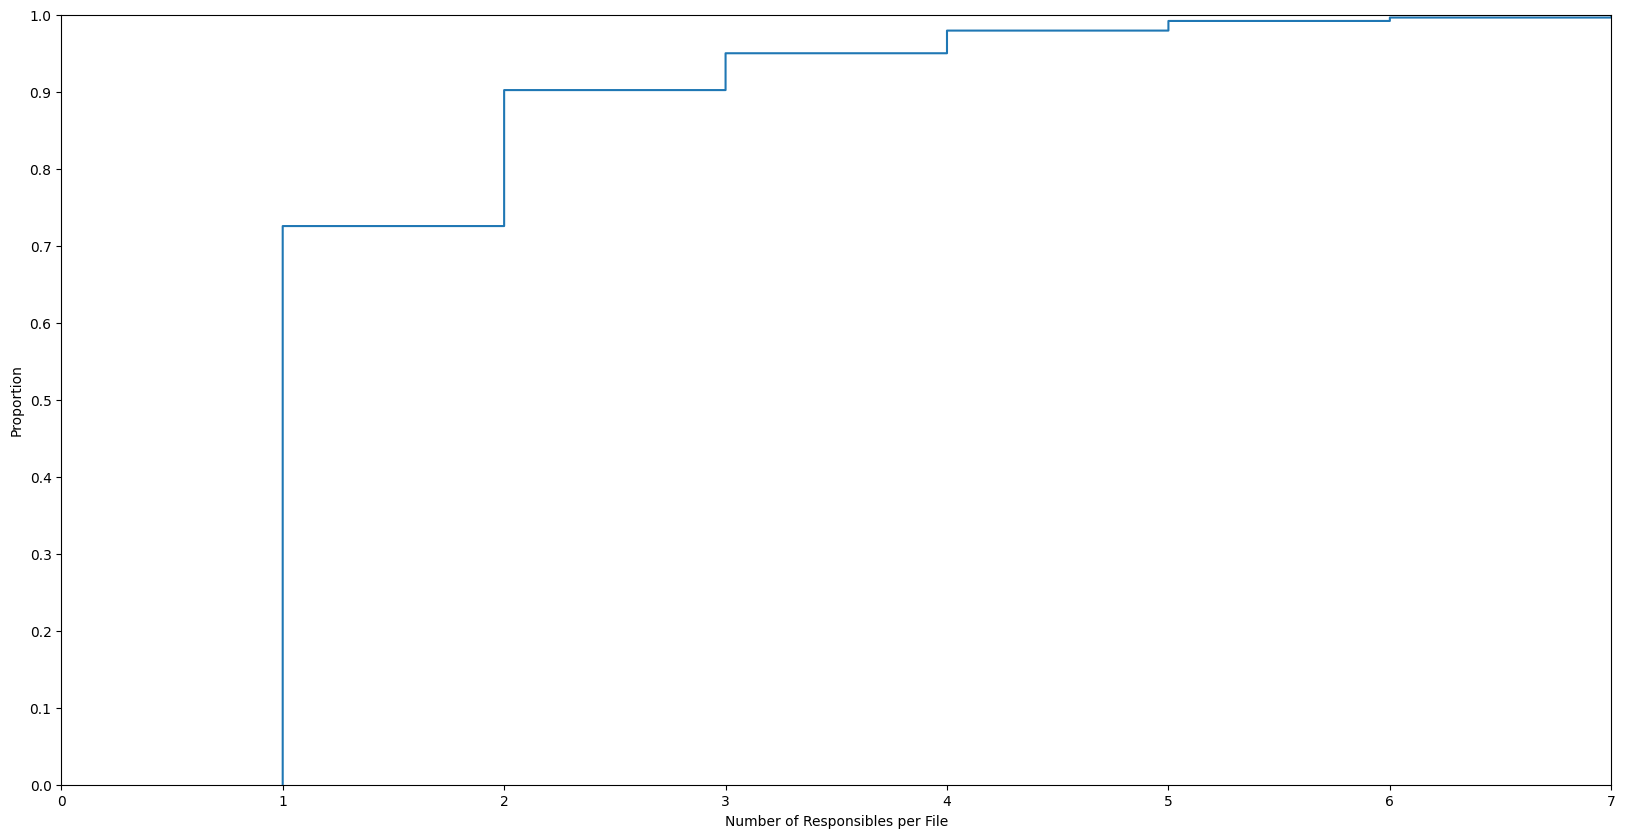

In [11]:
# Converter o dicionário para um DataFrame
data_responsaveis = pd.DataFrame(list(num_responsaveis_por_arquivo.items()), columns=['Arquivo', 'Contagem'])

# Definir o tamanho do gráfico
plt.figure(figsize=(20, 10))

# Criar o gráfico ECDF para a contagem de responsáveis por arquivo
sns.ecdfplot(data=data_responsaveis, x='Contagem')

plt.ylim(0, 1)  # Ajustar a escala do eixo y

plt.yticks(np.arange(0, 1.1, 0.1))  # Ajustar os ticks do eixo y para que sejam de 0.1 em 0.1

plt.xlabel('Number of Responsibles per File')  # Definir o rótulo do eixo x

# Ajustar a escala do eixo x, se necessário
plt.xlim(0, max(data_responsaveis['Contagem']))  # Ajuste conforme necessário

# Ajustar os ticks do eixo x para intervalos regulares, aqui ajustei para 1 em 1
plt.xticks(np.arange(0, max(data_responsaveis['Contagem'])+1, 1))

# Exibir o gráfico
plt.show()